#Standard Libraries

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [252]:
#loading the data
data = pd.read_csv('/content/MNIST_train.csv')

In [253]:
data.shape #reading the number of columns and rows

(60000, 787)

In [254]:
data.head() #reading the first five columns and rows

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [255]:
data.columns #reading the columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [256]:
data = data.drop(columns=['Unnamed: 0', 'index'], axis=1)#dropping the first two columns

In [257]:
data.shape #reading the dataset after dropping the columns

(60000, 785)

In [258]:
data.head() #reading a first five rows

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
X = data.to_numpy()#transforming the data to numpy array

In [260]:
y= X[:,0] #extracting the first column from the array and assigning it to variables y

In [261]:
y #displaying the data of y variable

array([5, 0, 4, ..., 5, 6, 8])

In [262]:
y.shape #displaying the rows and columns

(60000,)

In [263]:
X = X[:,1:] #removing the first column from the array x & updates x to store the remaining data

In [264]:
X.shape #displaying the rows and columns

(60000, 784)

In [265]:
X # displaying the array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#Data Visualization

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


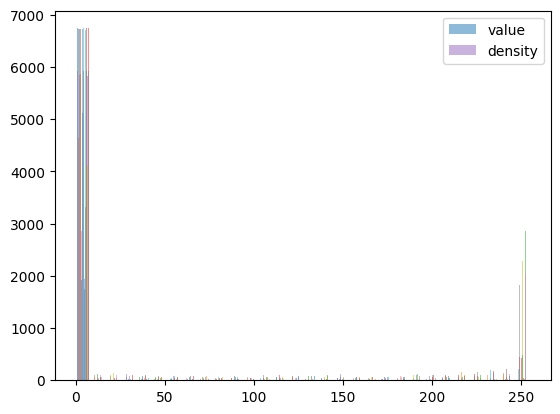

In [266]:
plt.figure()#make histogram
plt.hist(X[y==6,:], label ='value', alpha = 0.5, bins= 30)
plt.hist(X[y==1,:], label ='density', alpha = 0.5, bins= 30)
plt.legend()

# Training the model on train dataset

In [267]:
X= X/255  #Normalizing the data

In [268]:
X.shape #displaying the rows and solumns

(60000, 784)

In [269]:
from scipy.stats import multivariate_normal as mvn

In [270]:
class GausNB(): #define a class
  def fit(self ,X ,y , epsilon = 1e-3): #training the classifier
    self.likelihoods = dict() #creating an empty dict.to store likelihood for each class
    self.priors = dict()#creating an empty dict.to store prior probability for each class
    self.K = set(y.astype(int)) #creates a set of unique class labels

    for k in self.K:#creates set of unique class labels.
        X_k =X[y==k,:] #select a data points belonging to class
        self.likelihoods[k] = {'mean': X_k.mean(axis=0), 'cov': X_k.var(axis=0) + epsilon}#calculate & store the mean and covariance of the features for the current class. #estimation of the likelihood
        self.priors[k] = len(X_k)/len(X)# calculate and stores the prior probability of the current class

  def predict(self,X):#define predict method,which takes new data(x) as input& predict the class labels
    N,D =X.shape #get the number of samples(N) and feature (D) in the input data
    P_hat = np.zeros((N,len(self.K)))# creates a matrix to store the probabilities of each class for each sample

    for k,l in self.likelihoods.items():#for loop iterartes through the liklihood &priors,calculated during training.
      P_hat[:,k] = mvn.logpdf(X, l['mean'],l['cov'])+ np.log(self.priors[k])#calculate the probability of each class for each sample using Gaussian probability density function

    return P_hat.argmax(axis=1)#returns the class label with the highest probability for each sample & this is final prediction.

In [271]:
#matrix for calculating accuracy
def accuracy(y,y_hat):# y,represent actual labels and y_hat represent the predicted labels generated by machin learning model
  return np.mean(y==y_hat)#compare the elements of y array with corresponding elements of the y_hat(predicted label)
  #presumeably true label and predicted label match data point, the result is "true";otherwise, it's "false"

In [272]:
#creating an instance of the GausNB class and assigning it to the variable gnb.
gnb = GausNB()#it initalizes the object's attributes &prepare it for use

In [273]:
#gnb, the variables that hold an instance of the GausNB Class.fit,method of the GausNB calling fit-start learning from the data I'm giving you
gnb.fit(X,y,epsilon=1e-3)#x- training data, y-target variables.In MNIST,these would be the actual digits (0-9) each image represents.
#epsilon =1e-3,small amount to the variance during calculations to prevent issues that can arise from having zero variance for some features.

In [274]:
#the variable holding our trained Gaussian Naive Bayes classifier(gnb)
#predict()takes the data X and applies the classifier's learned rules to predict the class label (in this case, the digit) for each data point in X.
#(X)-the data we are using to make predictions. In the context of the MNIST dataset, it represents the pixel values of the handwritten digit images.
#y_hat -Essentially, it's the classifier's best guess at what digit each image represents.
y_hat = gnb.predict(X)

Text(0.5, 47.7222222222222, 'Predicted label')

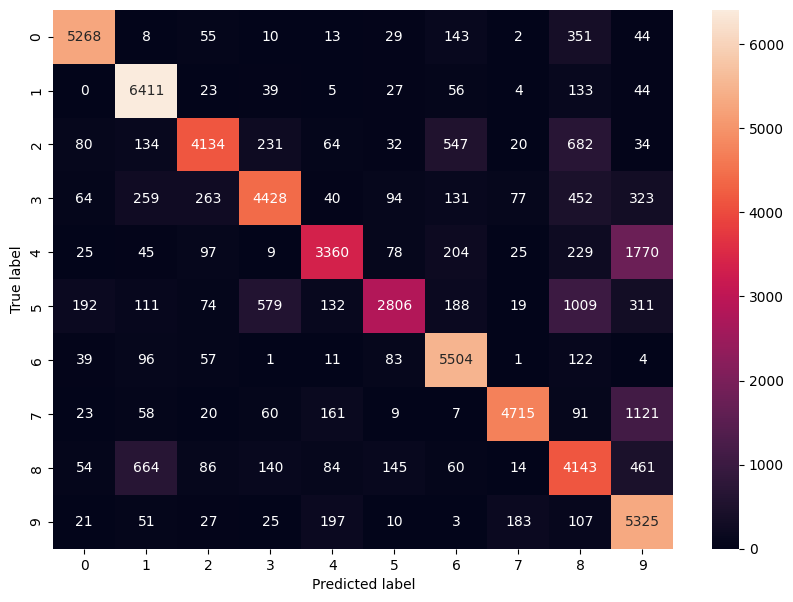

In [275]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [276]:
#a function call to the "accuracy" function defined earlier in the code.
# This variable represents the actual labels of the training data. In this case, these labels represent the true digits (0-9) corresponding to each image in the MNIST dataset.
#variable holds the predicted labels obtained by running the Gaussian Naive Bayes classifier (gnb) on the training data (X)
accuracy(y,y_hat)

0.7682333333333333

# Training the model on test data

In [277]:
data_test = pd.read_csv('/content/mnist_test.csv', header=None)

In [194]:
data_test.shape

(10000, 785)

In [195]:
data_test.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
data_test.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
      dtype='int64', length=785)

In [199]:
#data_test = data.drop(columns=['Unnamed: 0', 'index'], axis=1)#dropping the first two columns

In [224]:
X_test = data_test.to_numpy()

In [225]:
y_test= X_test[:,0]

In [226]:
y_test.shape

(10000,)

In [227]:
X_test = X_test[:,1:]

In [228]:
X_test.shape

(10000, 784)

In [229]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [230]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [231]:
#Normalising the data
X_test= X_test/255

In [232]:
X_test.shape

(10000, 784)

In [233]:
#Import the module
from scipy.stats import multivariate_normal as mvn

In [234]:
class GausNB():
  def fit(self ,X ,y , epsilon = 1.1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
        X_k =X[y==k,:]
        self.likelihoods[k] = {'mean': X_k.mean(axis=0), 'cov': X_k.var(axis=0) + epsilon}#
        self.priors[k] = len(X_k)/len(X)

  def predict(self,X):
    N,D =X.shape
    P_hat = np.zeros((N,len(self.K)))

    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l['mean'],l['cov'])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [235]:
def accuracy(y,y_hat):# matrix
  return np.mean(y==y_hat)

In [236]:
gnb = GausNB()

In [237]:
gnb.fit(X,y,epsilon=1.1e-2)

In [238]:
y_hat = gnb.predict(X_test)

Text(0.5, 47.7222222222222, 'Predicted label')

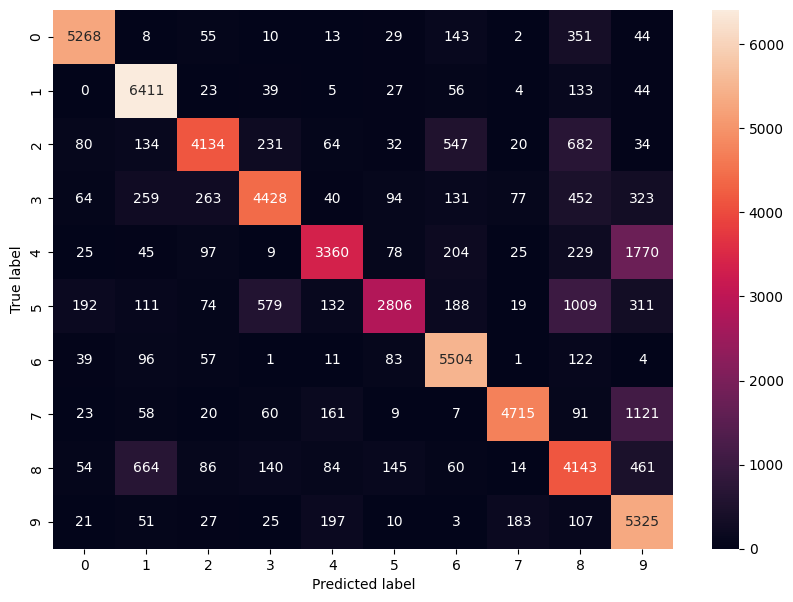

In [278]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [240]:
accuracy(y_test,y_hat)

0.8146